In [96]:
#importing required libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [97]:
# importing the Data

import pandas as pd

msgs = pd.read_csv('spam.csv',sep=',')
msgs.rename(columns={'v1':'label','v2':'message'},inplace=True)
msgs

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [102]:
df1=msgs[msgs['Unnamed: 2'].isnull()]
df2=df1[df1['Unnamed: 3'].isnull()]
df3=df2[df2['Unnamed: 4'].isnull()]
df3.drop_duplicates(subset=['label','message'],inplace=True)
df3.reset_index(inplace=True)
df3.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','index'],inplace=True)
df3

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5121,spam,This is the 2nd time we have tried 2 contact u...
5122,ham,Will �_ b going to esplanade fr home?
5123,ham,"Pity, * was in mood for that. So...any other s..."
5124,ham,The guy did some bitching but I acted like i'd...


In [103]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5126 non-null   object
 1   message  5126 non-null   object
dtypes: object(2)
memory usage: 80.2+ KB


<AxesSubplot:xlabel='label', ylabel='count'>

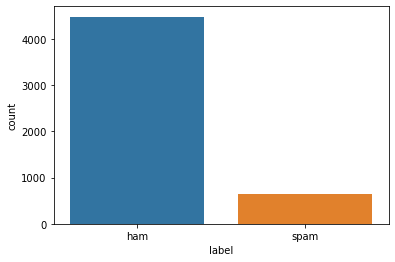

In [105]:
import seaborn as sns
sns.countplot(x="label",data=df3)

In [106]:
corpus = []
for i in range(0, len(df3)):
    review = re.sub('[^a-zA-Z]', ' ', df3['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [107]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [108]:
y=pd.get_dummies(df3['label'])
y=y.iloc[:,1].values

In [109]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Using MultinomialNB Naive bayes classifier

In [110]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detection_model_mnb = MultinomialNB().fit(X_train, y_train)

In [111]:
y_pred=spam_detect_model.predict(X_test)

In [112]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [113]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7134502923976608

# Using Randomforest Algorithm

In [114]:
from sklearn.ensemble import RandomForestClassifier
spam_detection_model_rf = RandomForestClassifier(n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [115]:
spam_detection_model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True)

In [116]:
y_pred_rf = spam_detection_model_rf.predict(X_test)

In [117]:
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rf)

0.8908382066276803

# Using Logistic regression

In [119]:
from sklearn.linear_model import LogisticRegression
spam_detection_model_lr = LogisticRegression()
spam_detection_model_lr.fit(X_train, y_train)

LogisticRegression()

In [120]:
spam_detection_model_lr.fit(X_train, y_train)

LogisticRegression()

In [121]:
y_pred_lr = spam_detection_model_lr.predict(X_test)

In [122]:
y_pred_lr

array([0, 0, 0, ..., 1, 0, 1], dtype=uint8)

In [123]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

0.9756335282651072

# Using KNN Algorithm

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [125]:
y_pred_knn = knn.predict(X_test)

In [126]:
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [127]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)

0.9298245614035088

# Using SVM

In [128]:
from sklearn.svm import SVC
spam_detection_model_svm = SVC(kernel = 'rbf')
spam_detection_model_svm.fit(X_train, y_train)

SVC()

In [129]:
y_pred_svm = spam_detection_model_svm.predict(X_test)

In [130]:
y_pred_svm

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svm)

0.969785575048733